In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [34]:
k = 2 # num classes/clusters

X = [1.5, 1.7, 2.0, 2.1, 2.9, 3.1, 3.8, 4.0] # samples
W = [-1]*len(X) # class associations of samples
prev_W = [] # to check if k-means finished

mu = [2, 4] # random initial means
N = [0]*k # to keep track of number of samples assigned to each cluster

In [35]:
print(mu)
while True:
    # assign classes
    N = [0]*k
    for i in range(len(X)):
        x = X[i]
        min_dist = np.inf
        nearest_class = -1
        for j in range(len(mu)):
            if abs(x-mu[j]) < min_dist:
                min_dist = abs(x-mu[j])
                nearest_class = j
        W[i] = nearest_class
        N[nearest_class] += 1
    
    # compute means
    mu = [0]*k
    for i in range(len(X)):
        x = X[i]
        w = W[i]
        n = N[w]
        if n == 0:
            mu[w] += 0
        else:
            mu[w] += x/N[w]

    if W == prev_W:
        break
    prev_W = W


[2, 4]


[0, 0, 0, 0, 1, 1, 1, 1]


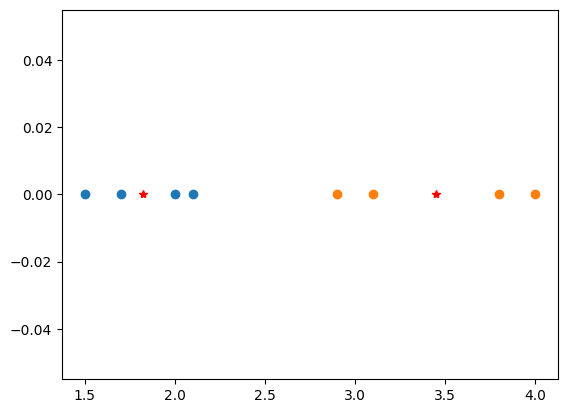

In [36]:
X_1 = [X[i] for i in range(len(X)) if W[i] == 0]
X_2 = [X[i] for i in range(len(X)) if W[i] == 1]
plt.plot(X_1, [0]*len(X_1), 'o')
plt.plot(X_2, [0]*len(X_2), 'o')
plt.plot(mu[0], 0, '*r')
plt.plot(mu[1], 0, '*r')
print(W)